In [2]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.pipeline import Pipeline
import numpy as np

In [3]:
df = pd.read_csv("NewCsvAssurances.csv")

df

,age,bmi,charges,is_male,is_female,is_smoker
0,19,27.900,16884.92400,0,1,1
1,18,33.770,1725.55230,1,0,0
2,28,33.000,4449.46200,1,0,0
3,33,22.705,21984.47061,1,0,0
4,32,28.880,3866.85520,1,0,0
...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0
1334,18,31.920,2205.98080,0,1,0
1335,18,36.850,1629.83350,0,1,0
1336,21,25.800,2007.94500,0,1,0


In [4]:
#model = LinearRegression()
model= make_pipeline(StandardScaler(),SVR())

In [5]:
y = df["charges"]
x= df.drop ("charges", axis= 1)

In [6]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [7]:
x

,age,bmi,is_male,is_female,is_smoker
0,19,27.900,0,1,1
1,18,33.770,1,0,0
2,28,33.000,1,0,0
3,33,22.705,1,0,0
4,32,28.880,1,0,0
...,...,...,...,...,...
1333,50,30.970,1,0,0
1334,18,31.920,0,1,0
1335,18,36.850,0,1,0
1336,21,25.800,0,1,0


In [8]:
model.fit(x,y)
model.score(x,y)

-0.09465176815560694

Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Text(0.5, 1.0, 'Test set')

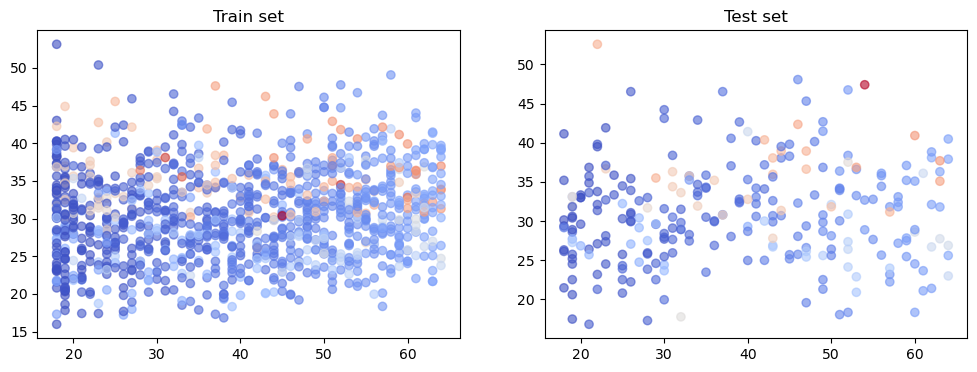

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_train,alpha=0.6,cmap='coolwarm')
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=y_test,alpha=0.6,cmap= 'coolwarm')
plt.title('Test set')




In [11]:
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train, y_train)
print(model.score(X_train,y_train))

0.9935511072282721


In [12]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test ))

0.263738935304656


Cross validation

In [13]:
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as skl_metrics 


pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': [3, 5,6,7,8,9, 10, 15, 20,21,22,23,24,25,26,27,28,29,30]}
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
y_pred= model.predict(X_train)

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score (MSE négatif) :", grid_search.best_score_)

best_model = grid_search.best_estimator_

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train_array = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train.values
y_train_scaled = scaler.fit_transform(y_train_array.reshape(-1, 1)).ravel()
scores = cross_val_score(best_model,X_train_scaled,y_train_scaled,cv=8,scoring='r2')
print (scores)
print (scores.mean())
rmse = skl_metrics.root_mean_squared_error(y_train,y_pred)
print('rmse :',rmse)

Meilleurs paramètres : {'kneighborsregressor__n_neighbors': 20}
Meilleur score (MSE négatif) : -25501179.098799054
[0.83993725 0.82474533 0.89917349 0.82919209 0.80416733 0.73581477
 0.80404788 0.83838581]
0.8219329936174189
rmse : 8874.881547111685


In [14]:
cross_val_score(KNeighborsRegressor(),X_train,y_train,cv=4,scoring='neg_mean_squared_error')

array([-1.21050397e+08, -1.43180315e+08, -1.25249218e+08, -1.30779862e+08])

In [15]:
y_pred = model.predict(X_train)
y_pred

array([ 8235.24676 , 14897.755854, 16863.649866, ..., 12149.90253 ,
       21351.28501 , 13231.012132])

In [16]:
y_pred2 =model.predict(x)
y_pred2

array([17604.439552,  1254.47462 , 10024.180396, ...,  8854.74301 ,
        2317.2465  , 23043.766   ])

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_pred)
mse

78763522.4752635

In [18]:
rmse= np.sqrt(mean_squared_error(y_train,y_pred))
rmse

8874.881547111685

In [19]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_train,y_pred)
mae

6081.695705149533

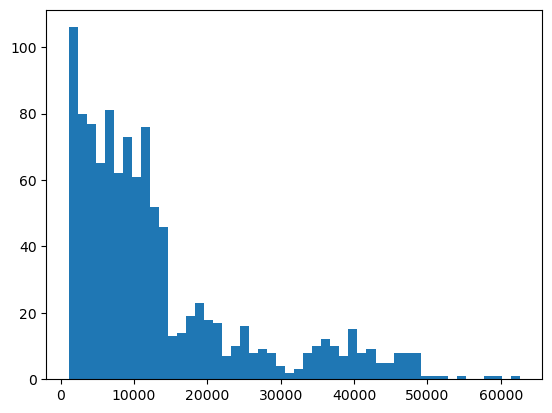

In [20]:
histogram_of_error= np.abs(y_train,y_pred)
plt.hist(histogram_of_error,bins=50)
plt.show()

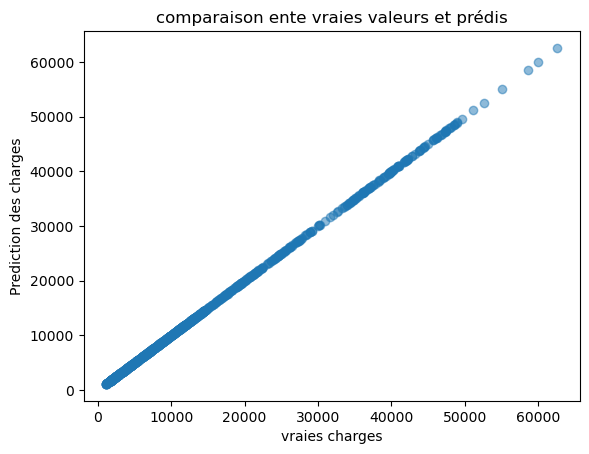

In [21]:
plt.scatter (y_train,y_pred,alpha=0.5)
plt.xlabel("vraies charges")
plt.ylabel("Prediction des charges")
plt.title("comparaison ente vraies valeurs et prédis")
plt.show()

Calcule du R2

In [22]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_train)  
r2 = r2_score(y_train, y_pred)
print("R² :", r2)


R² : 0.45429539271352126


Pearson et P value

In [23]:
from scipy.stats import pearsonr

In [24]:
correlation,p_value = pearsonr(X_train["bmi"],y_train)

print("Coefficient de Pearson :",correlation)
print("P-value", p_value)

Coefficient de Pearson : 0.19731629949070123
P-value 7.467475822628109e-11


In [25]:
df

,age,bmi,charges,is_male,is_female,is_smoker
0,19,27.900,16884.92400,0,1,1
1,18,33.770,1725.55230,1,0,0
2,28,33.000,4449.46200,1,0,0
3,33,22.705,21984.47061,1,0,0
4,32,28.880,3866.85520,1,0,0
...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0
1334,18,31.920,2205.98080,0,1,0
1335,18,36.850,1629.83350,0,1,0
1336,21,25.800,2007.94500,0,1,0


In [26]:
orrelation,p_value = pearsonr(X_train["age"],y_train)

print("Coefficient de Pearson :",correlation)
print("P-value", p_value)

Coefficient de Pearson : 0.19731629949070123
P-value 5.694480844063657e-21


In [27]:
orrelation,p_value = pearsonr(X_train["is_male"],y_train)

print("Coefficient de Pearson :",correlation)
print("P-value", p_value)

Coefficient de Pearson : 0.19731629949070123
P-value 0.06325648046006999


In [28]:
orrelation,p_value = pearsonr(X_train["is_female"],y_train)

print("Coefficient de Pearson :",correlation)
print("P-value", p_value)

Coefficient de Pearson : 0.19731629949070123
P-value 0.06325648046006999


In [29]:
orrelation,p_value = pearsonr(X_train["is_smoker"],y_train)

print("Coefficient de Pearson :",correlation)
print("P-value", p_value)

Coefficient de Pearson : 0.19731629949070123
P-value 1.0360773472183682e-219


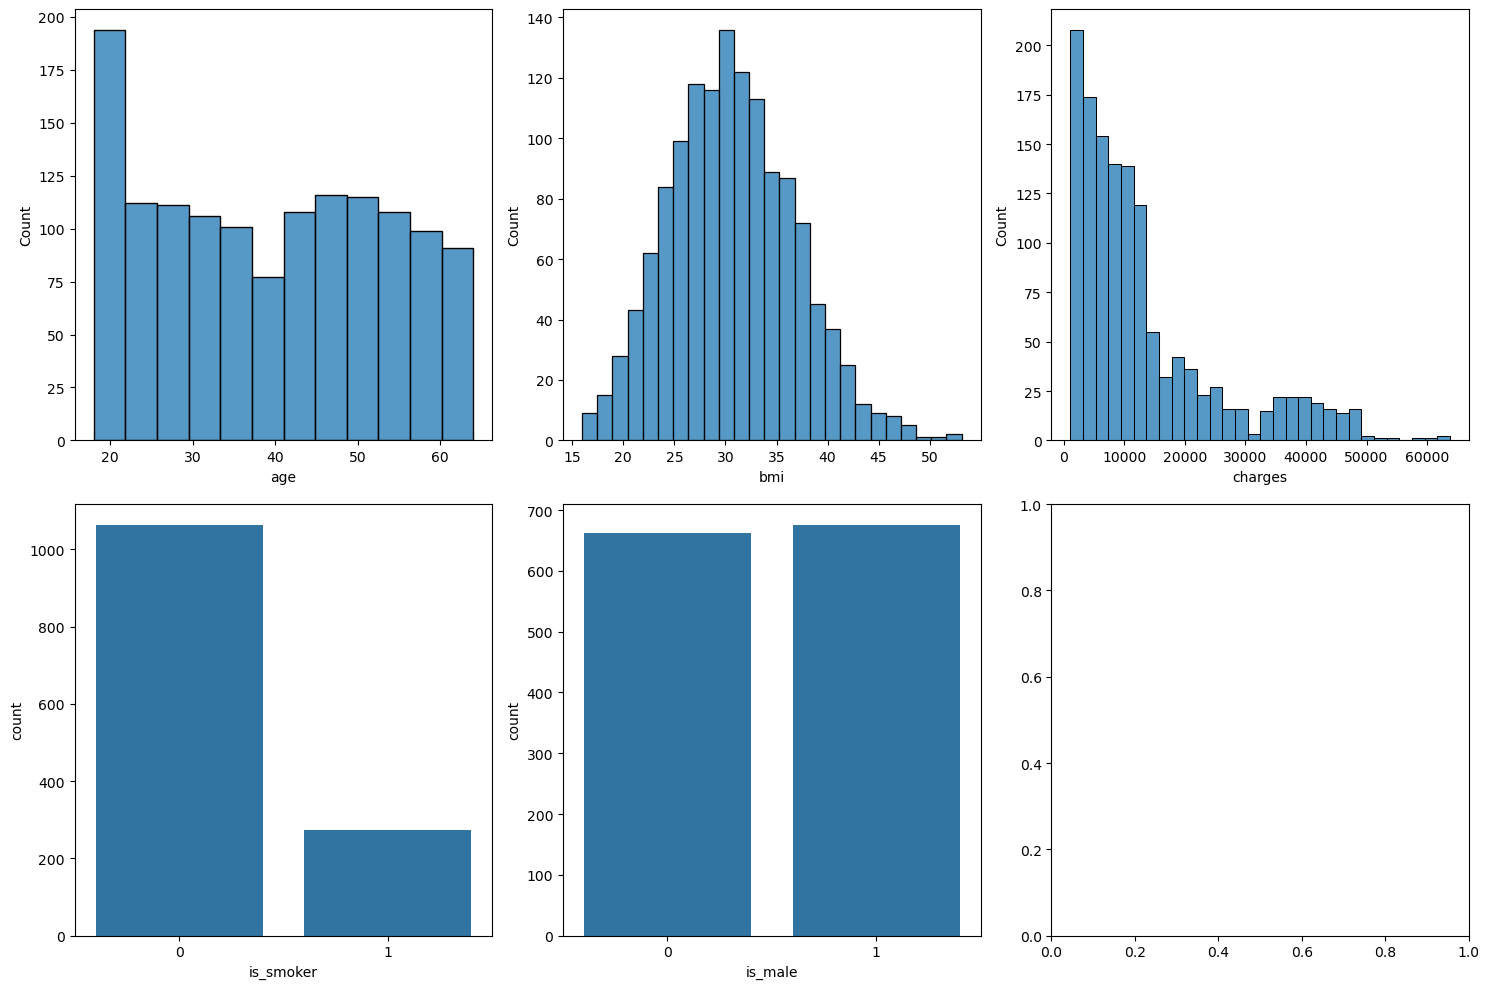

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(data=df, x='age', ax=axes[0,0])
sns.histplot(data=df, x='bmi', ax=axes[0,1])
sns.histplot(data=df, x='charges', ax=axes[0,2])
sns.countplot(data=df, x='is_smoker', ax=axes[1,0])
sns.countplot(data=df, x='is_male', ax=axes[1,1])
plt.tight_layout()
plt.show()

Création de pipelines incluant polynomial feature et test des différents modèles

In [31]:
from sklearn import svm

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}


results = {}


for name, model in models.items():
   
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', model)
    ])
    
    pipeline.fit(X_test, y_test)
    
    # Prédictions
    y_pred = pipeline.predict(X_test)
    
    # Calcul des métriques
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)


    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }


for model_name, metrics in results.items():
    print(f"\nRésultats pour {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Résultats pour Linear:
MSE: 20971807.6296
RMSE: 4579.4986
R2: 0.8649

Résultats pour Ridge:
MSE: 20972374.4375
RMSE: 4579.5605
R2: 0.8649

Résultats pour Lasso:
MSE: 20971856.1371
RMSE: 4579.5039
R2: 0.8649

Résultats pour ElasticNet:
MSE: 25872215.1449
RMSE: 5086.4737
R2: 0.8333


c:\Users\leoga\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.802e+06, tolerance: 4.161e+06
  model = cd_fast.enet_coordinate_descent(


Test des meilleurs hyperparamètre du meilleur modèle(Lasso)

In [32]:
pipeline = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2), Lasso())

# GridSearchCV pour optimiser alpha
param_grid = {'lasso__alpha':[100, 101,102,103,104,105,106,107,108, 109]}
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score (MSE négatif) :", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Évaluation avec validation croisée (R²)
scores = cross_val_score(best_model, X_test, y_test, cv=8, scoring='r2')
print("Scores R² pour chaque fold :", scores)
print("Score R² moyen :", scores.mean())


Meilleurs paramètres : {'lasso__alpha': 107}
Meilleur score (MSE négatif) : -24630856.51215279
Scores R² pour chaque fold : [0.93507884 0.7082202  0.92749944 0.66383916 0.89485711 0.64424747
 0.76592006 0.90111194]
Score R² moyen : 0.8050967781707733


Transformation de la Target :

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

x,y = fetch_california_housing(return_X_y=True)

transformer=QuantileTransformer(output_distribution='normal')

regressor=Lasso(alpha=0.1)
regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)


regr.fit(X_train, y_train)
print('R2 score avec Lasso (cible transformée) : {0:.2f}'.format(regr.score(X_test, y_test)))

raw_target_regr = Lasso(alpha=0.1).fit(X_train, y_train)
print('R2 score avec Lasso (sans transformation de la cible) : {0:.2f}'.format(raw_target_regr.score(X_test, y_test)))

R2 score avec Lasso (cible transformée) : 0.61
R2 score avec Lasso (sans transformation de la cible) : 0.78
